# Prediction Modeling Based on Hour feature

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn imports:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
import scikitplot as skplt
from sklearn.metrics import classification_report


In [28]:
# Read in fresh cleaned dataset
df = pd.read_csv('chicago_data_cleaned.csv')


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273756 entries, 0 to 4273755
Data columns (total 15 columns):
Date                    object
ID                      int64
Block                   int64
Primary Type            int64
Description             int64
Location Description    int64
Arrest                  bool
Domestic                bool
District                float64
Year                    int64
Latitude                float64
Longitude               float64
Month                   int64
Day                     int64
Hour                    int64
dtypes: bool(2), float64(3), int64(9), object(1)
memory usage: 432.0+ MB


In [30]:
df.head(3)

,Date,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Month,Day,Hour
0,2006-04-02 13:00:00,4673626,23279,12,173,66,False,False,16.0,2006,41.981913,-87.771996,4,2,13
1,2006-02-26 13:40:48,4673627,26672,10,217,75,True,False,3.0,2006,41.775733,-87.611920,2,26,13
2,2006-01-08 23:16:00,4673628,6596,0,40,58,False,False,3.0,2006,41.769897,-87.593671,1,8,23


In [31]:
df_for_model = df.drop(['ID','Hour', 'Latitude', 'Longitude', 'Date'], axis=1)

labels = df['Hour']

In [32]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273756 entries, 0 to 4273755
Data columns (total 10 columns):
Block                   int64
Primary Type            int64
Description             int64
Location Description    int64
Arrest                  bool
Domestic                bool
District                float64
Year                    int64
Month                   int64
Day                     int64
dtypes: bool(2), float64(1), int64(7)
memory usage: 269.0 MB


In [33]:
def evaluate_features(X, y, key=0):
    """
    General helper function for evaluating effectiveness of passed features in ML model

    Prints out Log loss, accuracy, and confusion matrix with 3-fold stratified cross-validation

    Parameters
    ----------
    X : Features array

    y : Labels array

    key: 0 = DecisionTreeClassifier (Default)
         1 = ExtraTreeClassifier
         2 = RandomForestClassifier
         3 = KNeighborsClassifier
         4 = GaussianNB
    """

    clf = [DecisionTreeClassifier(),
           ExtraTreeClassifier(),
           RandomForestClassifier(),
           KNeighborsClassifier(),
           GaussianNB()]
    
    clf_names = ['DecisionTreeClassifier',
                 'ExtraTreeClassifier',
                 'RandomForestClassifier', 
                 'KNeighborsClassifier',
                 'GaussianNB']

    probabilities = cross_val_predict(clf[key], X, y, cv=StratifiedKFold(n_splits=2, random_state=8),
                                      n_jobs=-1, method='predict_proba', verbose=2)
    predicted_indices = np.argmax(probabilities, axis=1)
    classes = np.unique(y)
    predicted = classes[predicted_indices]
    print('Log loss: {}'.format(log_loss(y, probabilities)))
    print('Accuracy: {}'.format(accuracy_score(y, predicted)))
    title = "Confusion Matrix for " + labels.name + " with " + clf_names[key]
    skplt.metrics.plot_confusion_matrix(y, predicted, normalize=True, figsize=(20,10), title=title)
    
    print(classification_report(y, predicted))
    plt.show()

## DecisionTreeClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   48.0s finished


Log loss: 32.8408297668657
Accuracy: 0.04905146667240713
              precision    recall  f1-score   support

           0       0.06      0.20      0.09    234301
           1       0.03      0.03      0.03    136257
           2       0.03      0.04      0.03    114353
           3       0.02      0.02      0.02     92674
           4       0.02      0.01      0.01     69126
           5       0.02      0.01      0.01     57262
           6       0.02      0.03      0.02     68253
           7       0.03      0.01      0.01     98337
           8       0.04      0.02      0.03    145540
           9       0.05      0.19      0.07    185285
          10       0.04      0.06      0.05    180587
          11       0.05      0.03      0.04    190569
          12       0.06      0.04      0.05    240359
          13       0.05      0.02      0.03    203171
          14       0.05      0.02      0.03    215501
          15       0.05      0.07      0.06    228691
          16       0.05 

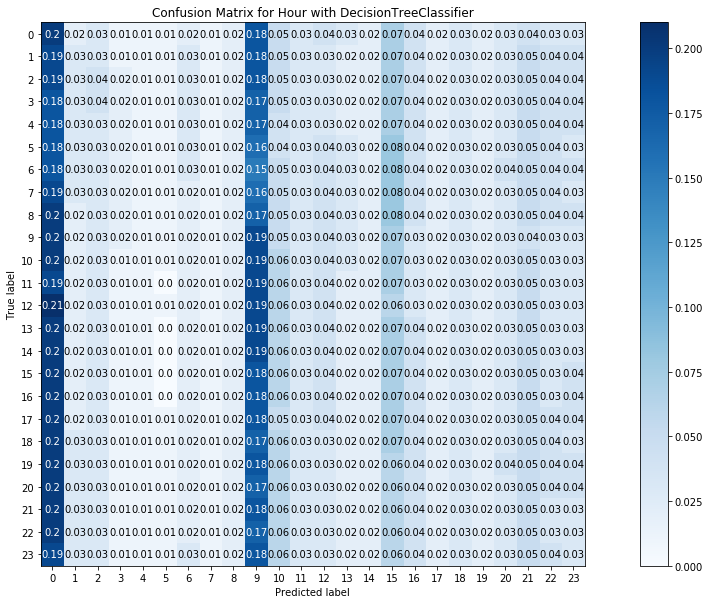

In [34]:
evaluate_features(df_for_model, labels)

## ExtraTreeClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   26.0s finished


Log loss: 32.68481946952934
Accuracy: 0.053572314376393974
              precision    recall  f1-score   support

           0       0.06      0.24      0.10    234301
           1       0.04      0.04      0.04    136257
           2       0.03      0.02      0.02    114353
           3       0.03      0.03      0.03     92674
           4       0.02      0.01      0.02     69126
           5       0.02      0.01      0.01     57262
           6       0.02      0.03      0.02     68253
           7       0.03      0.01      0.01     98337
           8       0.04      0.02      0.02    145540
           9       0.06      0.16      0.08    185285
          10       0.04      0.03      0.04    180587
          11       0.04      0.04      0.04    190569
          12       0.06      0.03      0.04    240359
          13       0.06      0.02      0.03    203171
          14       0.06      0.03      0.04    215501
          15       0.06      0.04      0.05    228691
          16       0.0

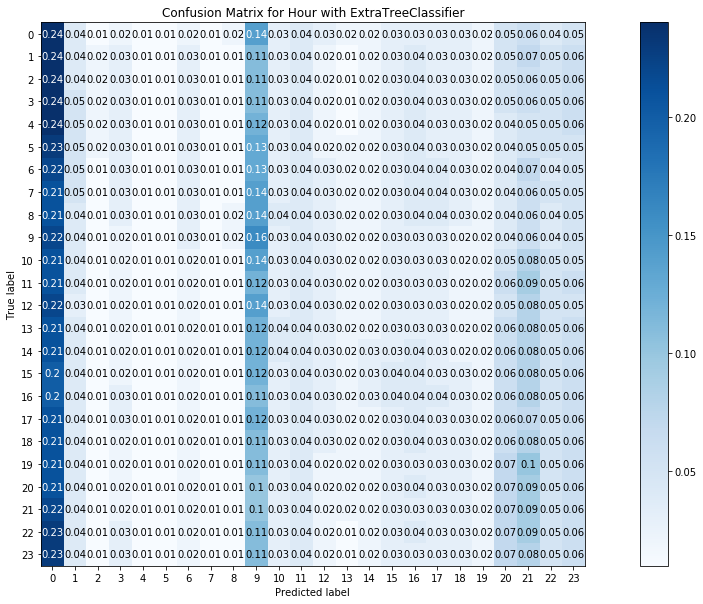

In [35]:
evaluate_features(df_for_model, labels, 1)

## RandomForestClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.4min finished


Log loss: 25.434123608398984
Accuracy: 0.05293166011349267
              precision    recall  f1-score   support

           0       0.06      0.40      0.10    234301
           1       0.04      0.03      0.03    136257
           2       0.04      0.01      0.02    114353
           3       0.03      0.01      0.02     92674
           4       0.02      0.01      0.01     69126
           5       0.02      0.00      0.01     57262
           6       0.02      0.06      0.03     68253
           7       0.03      0.01      0.01     98337
           8       0.04      0.02      0.02    145540
           9       0.05      0.27      0.09    185285
          10       0.04      0.06      0.05    180587
          11       0.05      0.02      0.03    190569
          12       0.07      0.02      0.03    240359
          13       0.05      0.01      0.02    203171
          14       0.06      0.01      0.02    215501
          15       0.06      0.02      0.03    228691
          16       0.0

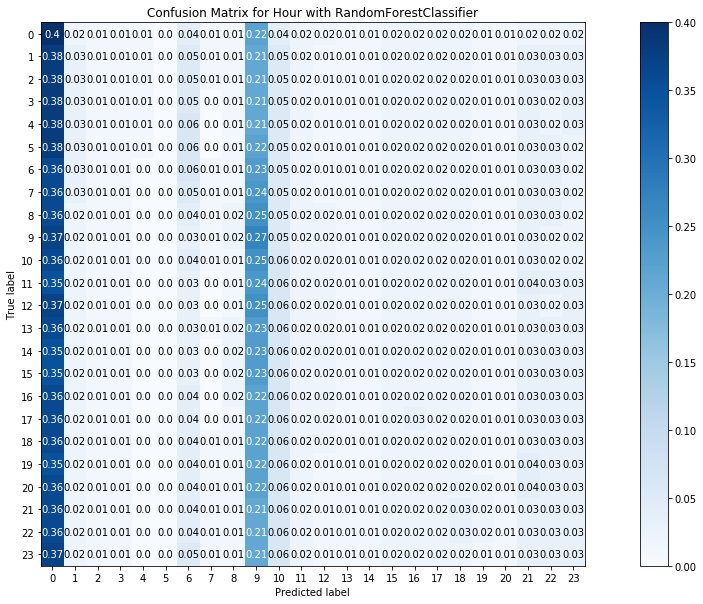

In [36]:
evaluate_features(df_for_model,labels,2)

## KNeighborsClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.8min finished


Log loss: 26.57734390520584
Accuracy: 0.05458734658693664
              precision    recall  f1-score   support

           0       0.07      0.22      0.10    234301
           1       0.04      0.11      0.06    136257
           2       0.04      0.08      0.05    114353
           3       0.03      0.06      0.04     92674
           4       0.02      0.04      0.03     69126
           5       0.02      0.03      0.02     57262
           6       0.03      0.04      0.03     68253
           7       0.03      0.05      0.04     98337
           8       0.05      0.06      0.05    145540
           9       0.06      0.07      0.07    185285
          10       0.05      0.05      0.05    180587
          11       0.06      0.05      0.05    190569
          12       0.07      0.06      0.06    240359
          13       0.06      0.04      0.05    203171
          14       0.06      0.04      0.05    215501
          15       0.07      0.04      0.05    228691
          16       0.06

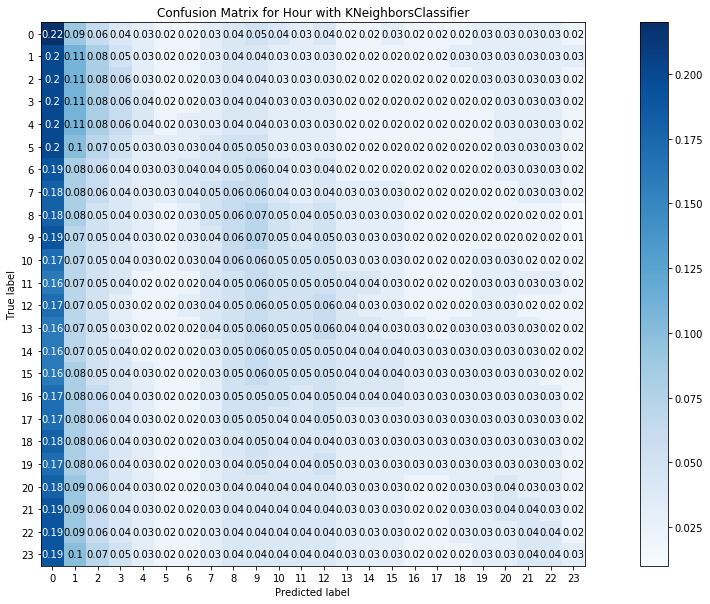

In [37]:
evaluate_features(df_for_model,labels,3)

## GaussianNB:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   27.4s finished


Log loss: 3.32245195955649
Accuracy: 0.05612744386904634


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.06      0.47      0.10    234301
           1       0.05      0.00      0.00    136257
           2       0.06      0.00      0.00    114353
           3       0.12      0.00      0.00     92674
           4       0.00      0.00      0.00     69126
           5       0.00      0.00      0.00     57262
           6       0.00      0.00      0.00     68253
           7       0.00      0.00      0.00     98337
           8       0.00      0.00      0.00    145540
           9       0.05      0.40      0.09    185285
          10       0.04      0.01      0.02    180587
          11       0.06      0.07      0.07    190569
          12       0.04      0.00      0.00    240359
          13       0.09      0.00      0.00    203171
          14       0.10      0.00      0.00    215501
          15       0.06      0.04      0.05    228691
          16       0.05      0.01      0.01    214522
          17       0.00    

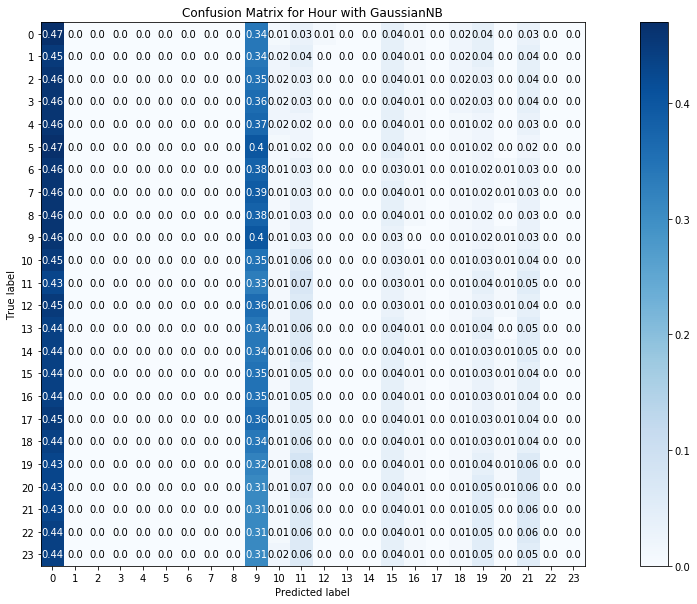

In [38]:
evaluate_features(df_for_model,labels,4)